In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# Importo libreria para trabajar con dates 
from datetime import timedelta
# Libreria para estimar regresión
import statsmodels.formula.api as sm
# Libreria para normalizar
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_excel('Trabajocoder.xlsx', sheet_name='1')

In [ ]:
# Análisis Exploratorio y Formulación de Hipótesis

# Este script realiza un análisis exploratorio inicial del dataset de una base de datos de una compañía de seguros,
# que incluye pagos de pólizas Agosto22 a Agosto24, datos socio-demográficos de los asegurados y siniestros.
# El objetivo del análisis exploratorio es obtener una comprensión preliminar de los datos, 
# identificar patrones, posibles anomalías y verificar la calidad de los datos.

# Después del análisis exploratorio, se procederá a formular preguntas clave e hipótesis
# basadas en los resultados del análisis, para luego profundizar en un análisis más detallado.

# Los siguientes pasos se llevarán a cabo:
# 1. Exploración de la estructura y calidad de los datos.
# 2. Limpieza de los datos en caso de que se detecten anomalías o valores nulos.
# 3. Visualización de las distribuciones de las variables principales, como siniestros, cobros y primas.
# 4. Formulación de hipótesis y preguntas de negocio basadas en el análisis inicial.
# 5. Validación de hipótesis mediante análisis estadístico y visualización de datos.

# El análisis se centra en entender cómo las variables de siniestros, primas y tipo de seguro están relacionadas entre sí
# y qué factores podrían estar asociados con una mayor ocurrencia de siniestros.





In [ ]:
# 1. Exploración de la estructura y calidad de los datos.

In [4]:
# Información general del DataFrame
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114259 entries, 0 to 114258
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Asegurado               114259 non-null  object        
 1   Fecha                   114259 non-null  datetime64[ns]
 2   Forma de pago           114259 non-null  object        
 3   Tipo de seguro          114259 non-null  int64         
 4   Póliza                  114259 non-null  int64         
 5   Endoso                  114259 non-null  int64         
 6   Provincia               114259 non-null  object        
 7   Moneda                  114259 non-null  object        
 8   Prima                   114259 non-null  object        
 9   Premio                  114259 non-null  object        
 10  Comisión normal         114259 non-null  object        
 11  Comisión cobranza       114259 non-null  object        
 12  Comisión fomento        114259

In [ ]:
##VOY A EXPLORAR LA COLUMNA FECHA PORQUE ESTÁ COMO DATE TIME Y PARA LOS ANÁLISIS ME INTERESA TENERLA DE FORMA NOMINAL POR MES

In [8]:
# Mostrar los nombres exactos de las columnas, incluyendo caracteres ocultos
print(repr(df.columns.tolist()))


['Asegurado', 'Fecha ', 'Forma de pago', 'Tipo de seguro', 'Póliza', 'Endoso', 'Provincia', 'Moneda', 'Prima', 'Premio', 'Comisión normal', 'Comisión cobranza', 'Comisión fomento', 'Comisión otras', 'Comisión total', 'Tipo Persona', 'CUIT', 'DNI', 'fecha de nacimiento', 'Domicilio', 'Pólizas contratadas', 'id', 'sexo', 'Cantidad robos totales', 'Cantidad robo ruedas', 'Cantidad robos general', 'Cantidad choques', 'Cantidad stros gral']


In [ ]:
# FECHA TIENE ESPACIOS QUE TENGO QUE BORRAR

In [9]:
# Eliminar espacios en blanco al inicio y al final de los nombres de columnas
df.columns = df.columns.str.strip()


In [10]:
print(df['Fecha'].head())


0   2022-08-02
1   2022-08-02
2   2022-08-02
3   2022-08-17
4   2022-08-17
Name: Fecha, dtype: datetime64[ns]


In [11]:
# Quiero verificar la cantidad de cobros que hay por mes, esto lo hago de la siguiente forma. Columna 'Fecha' esté en formato datetime
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')

# Crear una columna 'AñoMes' con el año y mes
df['AñoMes'] = df['Fecha'].dt.to_period('M')

# Contar la cantidad de registros por cada mes
conteo_por_mes = df['AñoMes'].value_counts().sort_index()

# Mostrar el resultado
print(conteo_por_mes)


AñoMes
2022-07      22
2022-08    3508
2022-09    3507
2022-10    3490
2022-11    3844
2022-12    3800
2023-01    3852
2023-02    3842
2023-03    4309
2023-04    4118
2023-05    4247
2023-06    4246
2023-07    5097
2023-08    4720
2023-09    4725
2023-10    4806
2023-11    4915
2023-12    4942
2024-01    5070
2024-02    5070
2024-03    5512
2024-04    5402
2024-05    5397
2024-06    5270
2024-07    5271
2024-08    5277
Freq: M, Name: count, dtype: int64


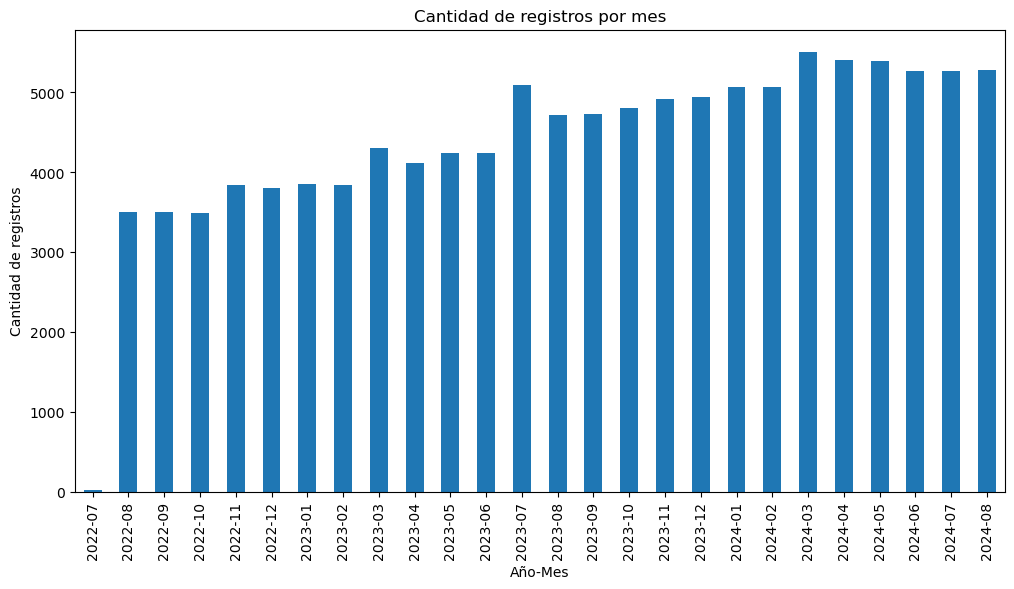

In [12]:
# Visualizar la cantidad de registros por mes
conteo_por_mes.plot(kind='bar', figsize=(12,6))
plt.title('Cantidad de registros por mes')
plt.xlabel('Año-Mes')
plt.ylabel('Cantidad de registros')
plt.show()


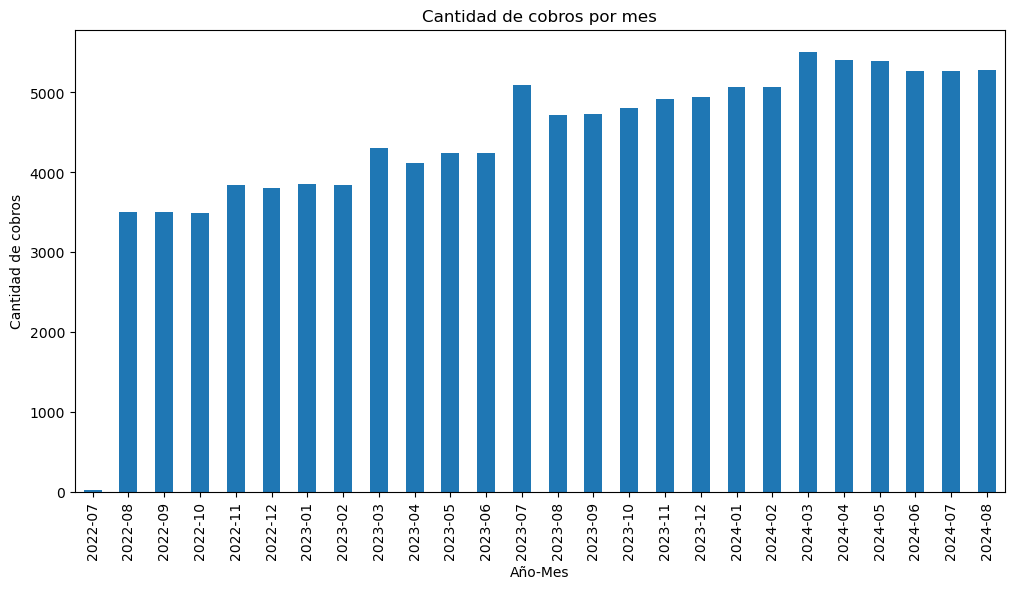

In [13]:
# Visualizar la cantidad de cobros por mes
conteo_por_mes.plot(kind='bar', figsize=(12,6))
plt.title('Cantidad de cobros por mes')
plt.xlabel('Año-Mes')
plt.ylabel('Cantidad de cobros')
plt.show()


In [14]:
print(df.describe(include='all'))


                           Asegurado                          Fecha  \
count                         114259                         114259   
unique                          2033                            NaN   
top     SERRANO VERONICA GUILLERMINA                            NaN   
freq                             485                            NaN   
mean                             NaN  2023-09-14 10:05:38.830201344   
min                              NaN            2022-07-04 00:00:00   
25%                              NaN            2023-03-17 00:00:00   
50%                              NaN            2023-09-28 00:00:00   
75%                              NaN            2024-03-18 00:00:00   
max                              NaN            2024-08-31 00:00:00   
std                              NaN                            NaN   

       Forma de pago  Tipo de seguro        Póliza         Endoso  \
count         114259   114259.000000  1.142590e+05  114259.000000   
unique   

In [15]:
print(df.isnull().sum())


Asegurado                     0
Fecha                         0
Forma de pago                 0
Tipo de seguro                0
Póliza                        0
Endoso                        0
Provincia                     0
Moneda                        0
Prima                         0
Premio                        0
Comisión normal               0
Comisión cobranza             0
Comisión fomento              0
Comisión otras                0
Comisión total                0
Tipo Persona                  0
CUIT                        271
DNI                        2215
fecha de nacimiento        5868
Domicilio                     0
Pólizas contratadas       19994
id                            0
sexo                          0
Cantidad robos totales        0
Cantidad robo ruedas          0
Cantidad robos general        0
Cantidad choques              0
Cantidad stros gral           0
AñoMes                        0
dtype: int64


In [16]:
for col in df.select_dtypes(include='object').columns:
    print(f"Columna '{col}' tiene {df[col].nunique()} valores únicos")
    print(df[col].value_counts())


Columna 'Asegurado' tiene 2033 valores únicos
Asegurado
SERRANO VERONICA GUILLERMINA    485
JANEZIC ANDRES                  420
HOURMILOUGUE SEBASTIAN          389
SCHMIDT ROBERTO CARLOS          377
LOPEZ IGNACIO                   367
                               ... 
JIMENEZ ISMAEL                    1
RODRIGUEZ MARCELO DANIEL          1
ROMERO THOMAS AGUSTIN             1
NEOFLEX SRL                       1
TESEYRA JOSE ALEJANDRO            1
Name: count, Length: 2033, dtype: int64
Columna 'Forma de pago' tiene 19 valores únicos
Forma de pago
DEBI    60127
PAGF    23189
PROD     7936
AJUS     5770
PMC      5733
EXPR     3764
RAPI     2369
LINK     2328
WEBS     1247
DEVO      558
PNET      442
AFIP      346
ART       110
PLUS      105
RIPS      103
PA24       61
DESC       50
MULT       13
PRON        8
Name: count, dtype: int64
Columna 'Provincia' tiene 17 valores únicos
Provincia
BUENOS AIRES           106350
CAPITAL                  4207
CORDOBA                   773
SANTA FE  

In [17]:
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    print(f"Columna '{col}': mínimo = {df[col].min()}, máximo = {df[col].max()}")


Columna 'Tipo de seguro': mínimo = 1, máximo = 80
Columna 'Póliza': mínimo = 104102, máximo = 32692265
Columna 'Endoso': mínimo = 0, máximo = 77
Columna 'Comisión fomento': mínimo = -53.8, máximo = 610.01
Columna 'Comisión otras': mínimo = 0, máximo = 0
Columna 'CUIT': mínimo = 2422601.0, máximo = 33716591269.0
Columna 'DNI': mínimo = 2350367.0, máximo = 266256227.0
Columna 'Cantidad robos totales': mínimo = 0, máximo = 1
Columna 'Cantidad robo ruedas': mínimo = 0, máximo = 2
Columna 'Cantidad robos general': mínimo = 0, máximo = 6
Columna 'Cantidad choques': mínimo = 0, máximo = 6
Columna 'Cantidad stros gral': mínimo = 0, máximo = 9


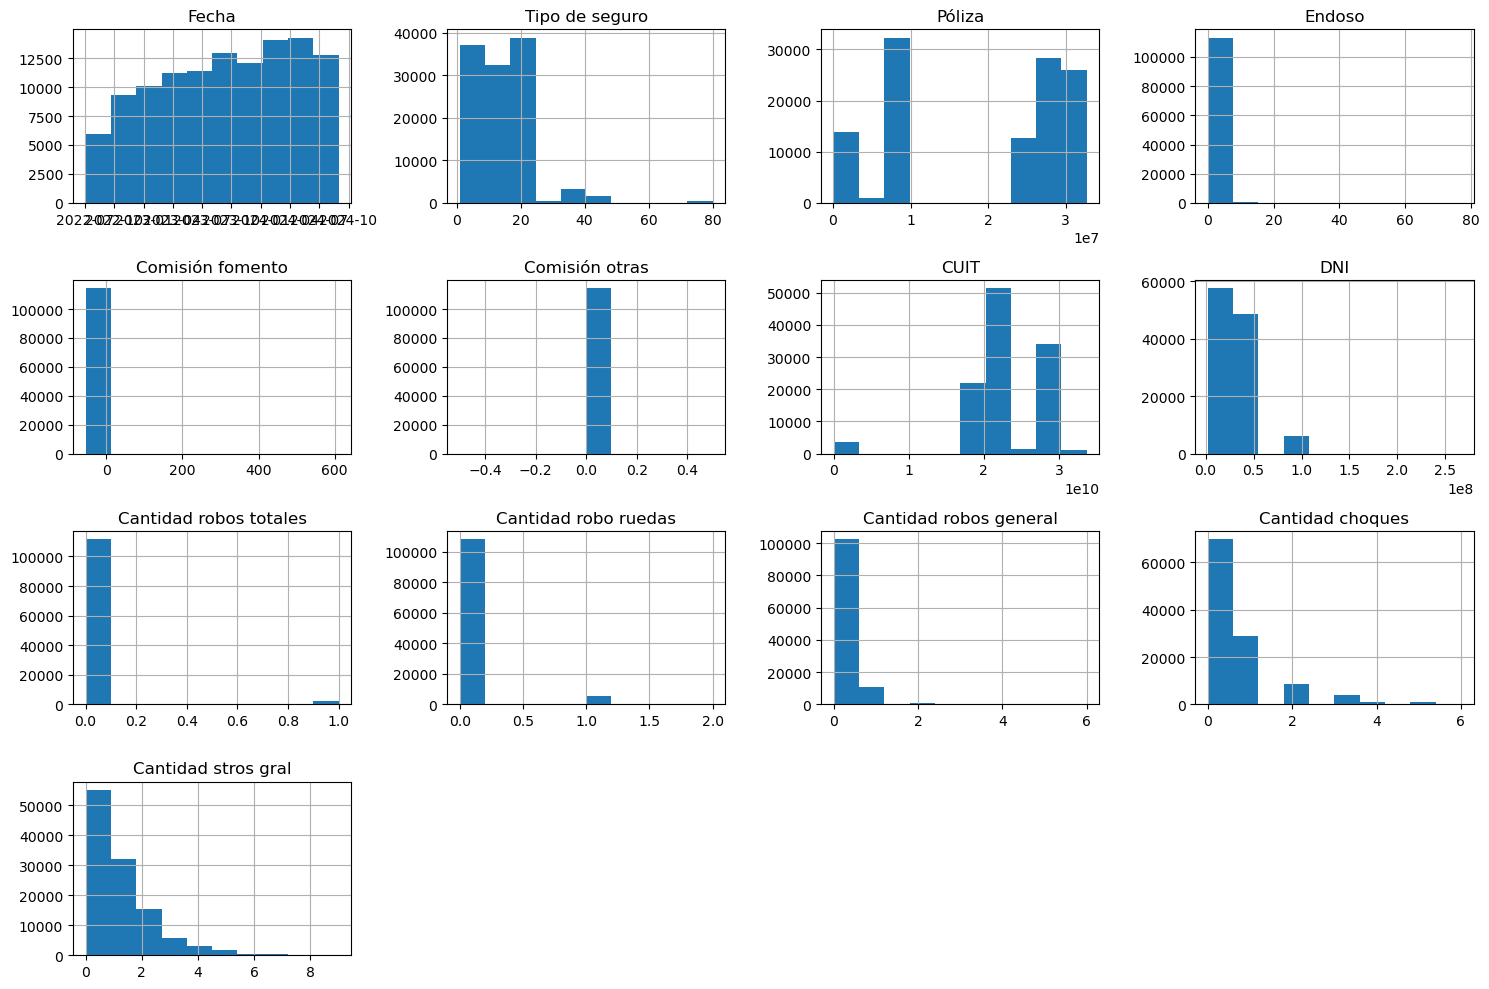

In [18]:
import matplotlib.pyplot as plt
df.hist(figsize=(15,10))
plt.tight_layout()
plt.show()


c:\Users\Fernando\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


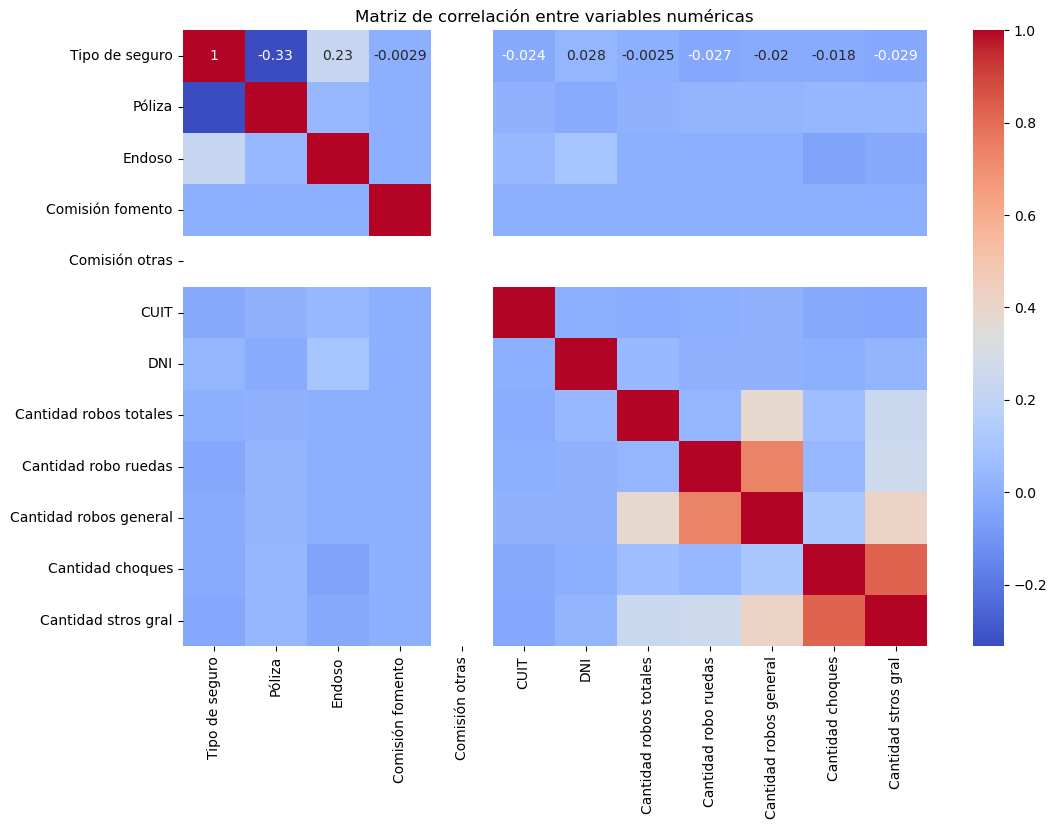

In [20]:
# Seleccionar solo las columnas numéricas
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

# Crear la matriz de correlación con las columnas numéricas
corr_matrix = numeric_cols.corr()

# Generar el mapa de calor
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación entre variables numéricas')
plt.show()


In [ ]:
## ME INTERESA SUMAR HABER COMO SE CORRELACIONAN Y COMPORTAN LA VARIABLE FECHA DE NACIMIENTO Y SEXO

In [22]:
# Asegurar que 'fecha de nacimiento' esté en formato datetime
df['fecha de nacimiento'] = pd.to_datetime(df['fecha de nacimiento'], errors='coerce')

# Calcular la edad en años
from datetime import datetime

# Fecha actual (puedes establecer una fecha fija si lo prefieres)
fecha_actual = datetime.now()

# Crear una nueva columna 'edad'
df['edad'] = df['fecha de nacimiento'].apply(lambda x: (fecha_actual - x).days // 365 if pd.notnull(x) else None)


In [23]:
# Verificar los valores únicos en la columna 'sexo'
print(df['sexo'].unique())


['Masculino' 'Femenino' 'empresa']


In [24]:
# Crear variables dummy para 'sexo'
sexo_dummies = pd.get_dummies(df['sexo'], prefix='sexo')

# Unir las variables dummy al DataFrame original
df = pd.concat([df, sexo_dummies], axis=1)


c:\Users\Fernando\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


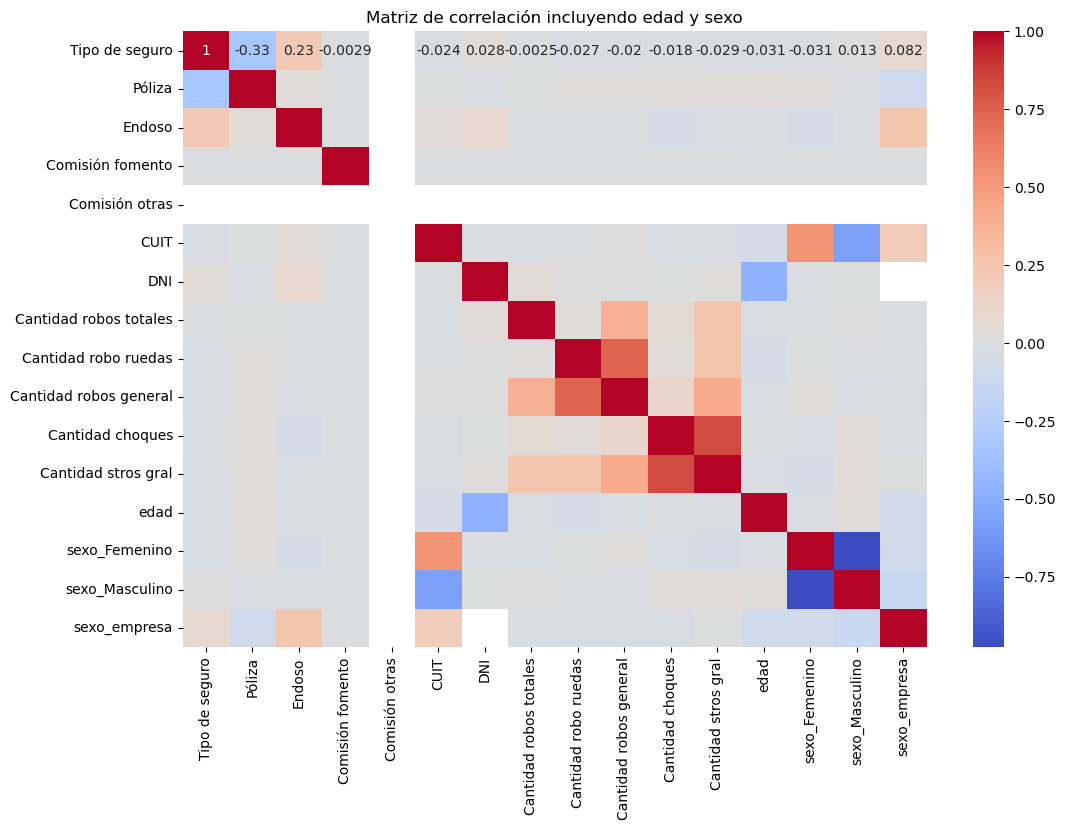

In [25]:
# Asegurarte de que 'edad' está incluida y es numérica
# (Si no lo has hecho aún, calcula 'edad' como se mostró anteriormente)

# Seleccionar las columnas numéricas
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Añadir la columna 'edad' si aún no está en numeric_cols
if 'edad' not in numeric_cols:
    numeric_cols.append('edad')

# Añadir las variables dummy de 'sexo' a las columnas numéricas
numeric_cols.extend(['sexo_Femenino', 'sexo_Masculino', 'sexo_empresa'])

# Crear un DataFrame solo con las columnas numéricas para el análisis
df_numeric = df[numeric_cols]

# Calcular la matriz de correlación
corr_matrix = df_numeric.corr()

# Generar el mapa de calor de correlaciones
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación incluyendo edad y sexo')
plt.show()


In [26]:
# Paso 1: Crear intervalos de edad
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['edad_intervalo'] = pd.cut(df['edad'], bins=bins, labels=labels, right=False)

# Paso 2: Generar la tabla de distribución
tabla_distribucion = pd.crosstab(df['edad_intervalo'], df['sexo'])

# Paso 3: Mostrar la tabla
print(tabla_distribucion)


sexo            Femenino  Masculino  empresa
edad_intervalo                              
0-17                  24          4      199
18-24                977       1386       61
25-34               7239      10897        0
35-44              12107      18822        0
45-54              10553      14884       56
55-64               7836       9628        1
65+                 4408       9257       52


In [27]:
# Paso 1: Crear intervalos de edad (si aún no lo has hecho)
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['edad_intervalo'] = pd.cut(df['edad'], bins=bins, labels=labels, right=False)

# Paso 2: Generar la tabla de distribución en porcentajes
tabla_distribucion_porcentaje = pd.crosstab(df['edad_intervalo'], df['sexo'], normalize='index') * 100

# Paso 3: Mostrar la tabla con porcentajes formateados
print(tabla_distribucion_porcentaje.round(2))


sexo            Femenino  Masculino  empresa
edad_intervalo                              
0-17               10.57       1.76    87.67
18-24              40.31      57.18     2.52
25-34              39.92      60.08     0.00
35-44              39.14      60.86     0.00
45-54              41.40      58.38     0.22
55-64              44.87      55.13     0.01
65+                32.14      67.49     0.38


In [28]:
# Paso 1: Crear intervalos de edad
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['edad_intervalo'] = pd.cut(df['edad'], bins=bins, labels=labels, right=False)

# Paso 2: Generar la tabla de distribución en porcentajes
tabla_distribucion_porcentaje = pd.crosstab(df['edad_intervalo'], df['sexo'], normalize='index') * 100
tabla_distribucion_porcentaje = tabla_distribucion_porcentaje.round(2)

# Paso 3: Calcular el promedio de 'Cantidad choques' para cada grupo
promedio_choques = df.groupby(['edad_intervalo', 'sexo'])['Cantidad choques'].mean().unstack()
promedio_choques = promedio_choques.round(2)

# Paso 4: Renombrar columnas para claridad
tabla_distribucion_porcentaje.columns = [f'{col} (%)' for col in tabla_distribucion_porcentaje.columns]
promedio_choques.columns = [f'{col} (Promedio Choques)' for col in promedio_choques.columns]

# Paso 5: Combinar las tablas
tabla_final = pd.concat([tabla_distribucion_porcentaje, promedio_choques], axis=1)

# Paso 6: Mostrar la tabla final
print(tabla_final)


                Femenino (%)  Masculino (%)  empresa (%)  \
edad_intervalo                                             
0-17                   10.57           1.76        87.67   
18-24                  40.31          57.18         2.52   
25-34                  39.92          60.08         0.00   
35-44                  39.14          60.86         0.00   
45-54                  41.40          58.38         0.22   
55-64                  44.87          55.13         0.01   
65+                    32.14          67.49         0.38   

                Femenino (Promedio Choques)  Masculino (Promedio Choques)  \
edad_intervalo                                                              
0-17                                   0.00                          0.00   
18-24                                  0.65                          0.48   
25-34                                  0.61                          0.68   
35-44                                  0.51                          0.65 

C:\Users\Fernando\AppData\Local\Temp\ipykernel_2584\3539123561.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  promedio_choques = df.groupby(['edad_intervalo', 'sexo'])['Cantidad choques'].mean().unstack()


In [29]:
# Paso 1: Crear los nuevos intervalos de edad
bins = [0, 36, 51, df['edad'].max()+1]
labels = ['Hasta 35 años', '36 a 50 años', 'Más de 51 años']
df['edad_intervalo'] = pd.cut(df['edad'], bins=bins, labels=labels, right=False)

# Paso 2: Generar la tabla de distribución en porcentajes
tabla_distribucion_porcentaje = pd.crosstab(df['edad_intervalo'], df['sexo'], normalize='index') * 100
tabla_distribucion_porcentaje = tabla_distribucion_porcentaje.round(2)

# Paso 3: Calcular el promedio de 'Cantidad choques' para cada grupo
promedio_choques = df.groupby(['edad_intervalo', 'sexo'])['Cantidad choques'].mean().unstack()
promedio_choques = promedio_choques.round(2)

# Paso 4: Renombrar columnas para claridad
tabla_distribucion_porcentaje.columns = [f'{col} (%)' for col in tabla_distribucion_porcentaje.columns]
promedio_choques.columns = [f'{col} (Promedio Choques)' for col in promedio_choques.columns]

# Paso 5: Combinar las tablas
tabla_final = pd.concat([tabla_distribucion_porcentaje, promedio_choques], axis=1)

# Paso 6: Mostrar la tabla final
print(tabla_final)


                Femenino (%)  Masculino (%)  empresa (%)  \
edad_intervalo                                             
Hasta 35 años          40.57          58.30         1.13   
36 a 50 años           39.14          60.74         0.13   
Más de 51 años         40.10          59.77         0.13   

                Femenino (Promedio Choques)  Masculino (Promedio Choques)  \
edad_intervalo                                                              
Hasta 35 años                          0.58                          0.66   
36 a 50 años                           0.55                          0.65   
Más de 51 años                         0.60                          0.63   

                empresa (Promedio Choques)  
edad_intervalo                              
Hasta 35 años                          0.0  
36 a 50 años                           0.0  
Más de 51 años                         0.0  


C:\Users\Fernando\AppData\Local\Temp\ipykernel_2584\3716207882.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  promedio_choques = df.groupby(['edad_intervalo', 'sexo'])['Cantidad choques'].mean().unstack()


In [30]:
# Paso 1: Crear los nuevos intervalos de edad (si aún no lo has hecho)
bins = [0, 36, 51, df['edad'].max()+1]
labels = ['Hasta 35 años', '36 a 50 años', 'Más de 51 años']
df['edad_intervalo'] = pd.cut(df['edad'], bins=bins, labels=labels, right=False)

# Paso 2: Generar la tabla de distribución en porcentajes
tabla_distribucion_porcentaje = pd.crosstab(df['edad_intervalo'], df['sexo'], normalize='index') * 100
tabla_distribucion_porcentaje = tabla_distribucion_porcentaje.round(2)

# Paso 3: Calcular el promedio de 'Cantidad robo ruedas' para cada grupo
promedio_robo_ruedas = df.groupby(['edad_intervalo', 'sexo'])['Cantidad robo ruedas'].mean().unstack()
promedio_robo_ruedas = promedio_robo_ruedas.round(2)

# Paso 4: Renombrar columnas para claridad
tabla_distribucion_porcentaje.columns = [f'{col} (%)' for col in tabla_distribucion_porcentaje.columns]
promedio_robo_ruedas.columns = [f'{col} (Prom. Robo Ruedas)' for col in promedio_robo_ruedas.columns]

# Paso 5: Combinar las tablas
tabla_final = pd.concat([tabla_distribucion_porcentaje, promedio_robo_ruedas], axis=1)

# Paso 6: Mostrar la tabla final
print(tabla_final)


                Femenino (%)  Masculino (%)  empresa (%)  \
edad_intervalo                                             
Hasta 35 años          40.57          58.30         1.13   
36 a 50 años           39.14          60.74         0.13   
Más de 51 años         40.10          59.77         0.13   

                Femenino (Prom. Robo Ruedas)  Masculino (Prom. Robo Ruedas)  \
edad_intervalo                                                                
Hasta 35 años                           0.06                           0.09   
36 a 50 años                            0.08                           0.05   
Más de 51 años                          0.04                           0.04   

                empresa (Prom. Robo Ruedas)  
edad_intervalo                               
Hasta 35 años                           0.0  
36 a 50 años                            0.0  
Más de 51 años                          0.0  


C:\Users\Fernando\AppData\Local\Temp\ipykernel_2584\602951481.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  promedio_robo_ruedas = df.groupby(['edad_intervalo', 'sexo'])['Cantidad robo ruedas'].mean().unstack()


In [32]:
# Paso 1: Crear los intervalos de edad (si aún no lo has hecho)
bins = [0, 36, 51, df['edad'].max()+1]
labels = ['Hasta 35 años', '36 a 50 años', 'Más de 51 años']
df['edad_intervalo'] = pd.cut(df['edad'], bins=bins, labels=labels, right=False)

# Paso 2: Generar la tabla de distribución en porcentajes
tabla_distribucion_porcentaje = pd.crosstab(df['edad_intervalo'], df['sexo'], normalize='index') * 100
tabla_distribucion_porcentaje = tabla_distribucion_porcentaje.round(2)

# Paso 3: Calcular el promedio de 'Cantidad stros gral' para cada grupo
promedio_stros_gral = df.groupby(['edad_intervalo', 'sexo'])['Cantidad stros gral'].mean().unstack()
promedio_stros_gral = promedio_stros_gral.round(2)

# Paso 4: Renombrar columnas para claridad
tabla_distribucion_porcentaje.columns = [f'{col} (%)' for col in tabla_distribucion_porcentaje.columns]
promedio_stros_gral.columns = [f'{col} (Prom. Stros Gral)' for col in promedio_stros_gral.columns]

# Paso 5: Combinar las tablas
tabla_final = pd.concat([tabla_distribucion_porcentaje, promedio_stros_gral], axis=1)

# Paso 6: Mostrar la tabla final
print(tabla_final)


                Femenino (%)  Masculino (%)  empresa (%)  \
edad_intervalo                                             
Hasta 35 años          40.57          58.30         1.13   
36 a 50 años           39.14          60.74         0.13   
Más de 51 años         40.10          59.77         0.13   

                Femenino (Prom. Stros Gral)  Masculino (Prom. Stros Gral)  \
edad_intervalo                                                              
Hasta 35 años                          0.86                          0.96   
36 a 50 años                           0.88                          1.09   
Más de 51 años                         0.90                          0.90   

                empresa (Prom. Stros Gral)  
edad_intervalo                              
Hasta 35 años                         0.45  
36 a 50 años                          0.00  
Más de 51 años                        0.98  


C:\Users\Fernando\AppData\Local\Temp\ipykernel_2584\262466830.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  promedio_stros_gral = df.groupby(['edad_intervalo', 'sexo'])['Cantidad stros gral'].mean().unstack()
